# 逻辑斯特回归以及牛顿法

In [259]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #绘制3D坐标的函数
import math

## 数据
学生分数 录取数据
* x = [first exam score , second exam score]
* y = 0 not admitted 1 admitted

In [260]:
f = open('ex4x.dat','r+')
x = f.readlines()
x = np.array([[float(ii) for ii in i.strip('\n').split()]  for i in x]) ##去换行符
f = open('ex4y.dat','r+')
y = f.readlines()
y = np.array([ float(i.strip('\n'))  for i in y]) ##去换行符

### 数据可视化

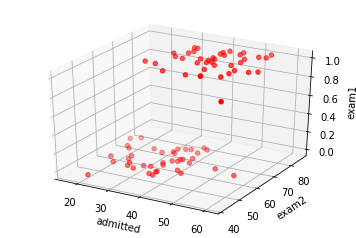

In [261]:
px, py, pz = x[:,0], x[:,1], y

ax = plt.subplot(111, projection='3d')  # 创建一个三维的绘图工程
#  将数据点分成三部分画，在颜色上有区分度

ax.scatter(px, py, pz, c='r')

ax.set_zlabel('exam1')  # 坐标轴
ax.set_ylabel('exam2')
ax.set_xlabel('admitted')
plt.show()

Text(0,0.5,'exam2')

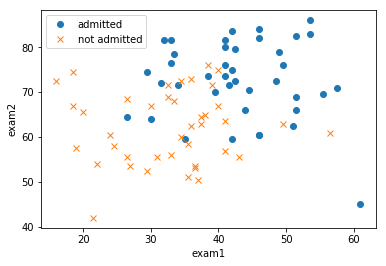

In [262]:
plt.plot( x[np.where(y == 1.0)][:,0],x[np.where(y == 1.0)][:,1],'o',label = 'admitted')
plt.plot( x[np.where(y == 0.0)][:,0],x[np.where(y == 0.0)][:,1],'x',label = 'not admitted')
plt.legend()
plt.xlabel("exam1")
plt.ylabel("exam2")

### 对数据进行归一化
* 加速后面的算法过程
* 减去均值 除以 方差

In [263]:
m = len(y)
x1 = x[:,0]
x2 = x[:,1]
x = np.array([np.ones(m),x1,x2])
x = x.T
y = y.T
##normalization
mu = np.array([np.mean(x[:,1]),np.mean(x[:,2])])
sigma = np.array([np.std(x[:,1]),np.std(x[:,2])])
print(sigma)
x[:,1] = (x[:,1] - mu[0])/sigma[0]
x[:,2] = (x[:,2] - mu[1])/sigma[1]

x1 = x[:,1]
x2 = x[:,2]

[9.86103443 9.82161002]


Text(0,0.5,'exam2')

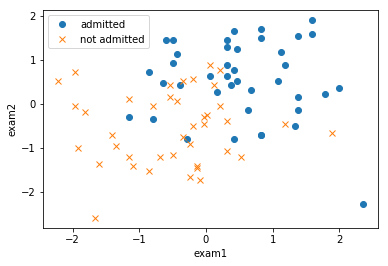

In [264]:
plt.plot( x[np.where(y == 1.0)][:,1],x[np.where(y == 1.0)][:,2],'o',label = 'admitted')
plt.plot( x[np.where(y == 0.0)][:,1],x[np.where(y == 0.0)][:,2],'x',label = 'not admitted')
plt.legend()
plt.xlabel("exam1")
plt.ylabel("exam2")

## 逻辑回归
* 公式：
$ h_θ(x) = g(θ^Tx) = \frac{1}{(1 + e^{−θ^T x}))= P(y = 1 | x;θ)} $
* loss:
$ J(θ) = \frac{1}{m} \sum_{i=1} ^m [−y^{(i)} log(h_θ(x^{(i)}))−(1−y^{(i)})log(1−h_θ(x^{(i)}))]  $

In [265]:

def h(theta,x): ## 逻辑回归
    return 1/(1 + np.exp(-theta.T.dot(x)))
def loss(tehta,x,y):
    m = len(x)
    left = -y*(np.log(h(theta,x)))
    right =  - (1 - y)*(np.log(1 - h(theta,x)))
    return np.sum(left + right)


In [266]:
x = x.T
y = y.T
theta = np.array([[0,0,0]]).T ## 初始化,勿忘bias

In [267]:
print(x.shape)
print(y.shape)
print(theta.shape)
loss(theta,x,y)

(3L, 80L)
(80L,)
(3L, 1L)


55.451774444795625

## 牛顿方法
* 求导： $ ∇_θJ =\frac{1}{m}\sum^m _{i=1} (h_θ(x^{(i)})−y^{(i)})x^{(i)} $
* 下降： $θ(t+1) = θ(t) −H^{−1}∇_θJ$
* 海森矩阵：

$$\begin{bmatrix}
{∇_{θ_0}∇_{θ_0}J(θ)}&{\cdots}&{∇_{θ_0}∇_{θ_n}J(θ)}\\
{\vdots}&{\ddots}&{\vdots}\\
{∇_{θ_n}∇_{θ_0}J(θ)}&{\cdots}&{∇_{θ_n}∇_{θ_n}J(θ)}\\
\end{bmatrix}$$

In [268]:
##求一次一个数据的海森矩阵
def computeHessianMatrix(x, hypothesis):
    hessianMatrix = []
    n = len(x)
    for i in range(n):
        row = []
        for j in range(n):
            row.append(-x[i]*x[j]*(1-hypothesis)*hypothesis)
        hessianMatrix.append(row)
    return hessianMatrix

In [269]:
def get_grad(theta,x,y):
    return np.sum((h(theta,x) - y)*x)/len(x)

### 参数优化 牛顿法梯度下降

In [270]:
theta = np.zeros((3)).T
loss_result = []
n = 3 ##特征维度 
for i in range(50):
    loss_result.append(loss(theta,x,y))
    hessianMatSum = np.zeros((n,n))
    gradientSum = np.zeros((n))
    m = len(x.T)
    for i in range(m):
            error = y[i] - h(theta,x[:,i])
            gradient = x[:,i]*error/m
            gradientSum = gradientSum+gradient
            
            hessian = computeHessianMatrix(x[:,i], h(theta,x[:,i])/m)
            hessian = np.array(hessian)
            hessian = hessian.reshape(3,3)
            for j in range(n):
                 hessianMatSum[j] = hessianMatSum[j]+hessian[j]
    
    hessianMatInv = np.array(np.mat(hessianMatSum).I.tolist())
    theta = theta - hessianMatInv.dot(gradientSum)

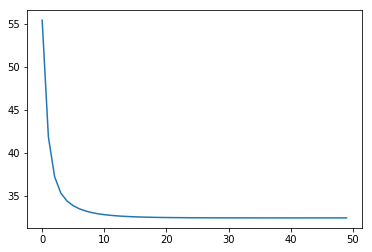

In [271]:
plt.plot(np.arange(0,50,1),loss_result,'-')

In [279]:
theta
x = x.T
y = y.T

Text(0,0.5,'exam2')

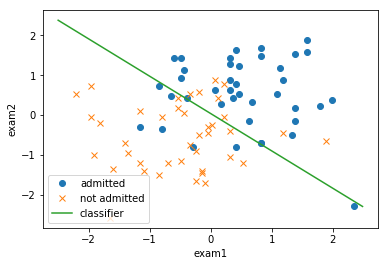

In [286]:

plt.plot( x[np.where(y == 1.0)][:,1],x[np.where(y == 1.0)][:,2],'o',label = 'admitted')
plt.plot( x[np.where(y == 0.0)][:,1],x[np.where(y == 0.0)][:,2],'x',label = 'not admitted')
a = np.arange(-2.5, 2.5, 0.01)
b = (-theta[0]-theta[1]*a)/theta[2]
plt.plot(a,b,'-',label = 'classifier')
plt.legend()
plt.xlabel("exam1")
plt.ylabel("exam2")